In [1]:
import sys
sys.path.append('../')
import mobipy
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Load a model application object from a model file and a data file
app = mobipy.Model_Application.build_from_model_and_data_file(
    '../models/simplyp_model.txt',
    '../models/data/simplyp_tarland.dat', store_all_series=True)

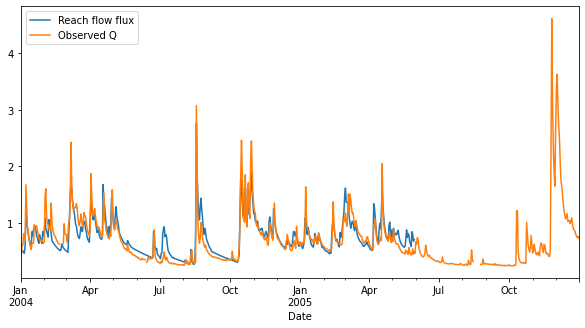

In [3]:
# Run the model
app.run()

fig, ax = plt.subplots(1, figsize=(10, 5))
# Extract and plot a result series
app.var("Reach flow flux")["Coull"].plot(ax=ax)
app.var("Observed Q")[()].loc['2004-1-1':'2005-12-31'].plot(ax=ax)
ax.legend()

In [4]:
# Set a different start date and re-run
app.start_date = '1995-1-1'
app.run()

True

<Axes: xlabel='Date'>

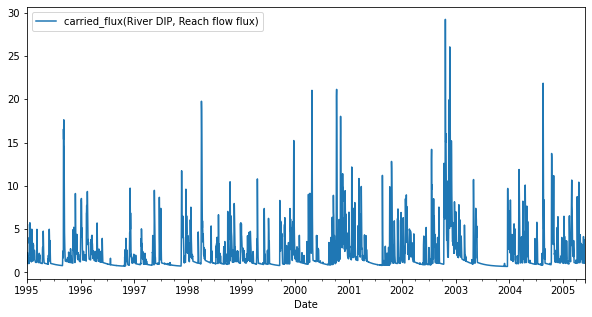

In [5]:
# Get the transport of dissolved phosphorous with the river flow
phos_flux = app.var("Reach flow flux").phos
phos_flux['Coull'].plot(figsize=(10, 5), legend=True)

<Axes: xlabel='Date'>

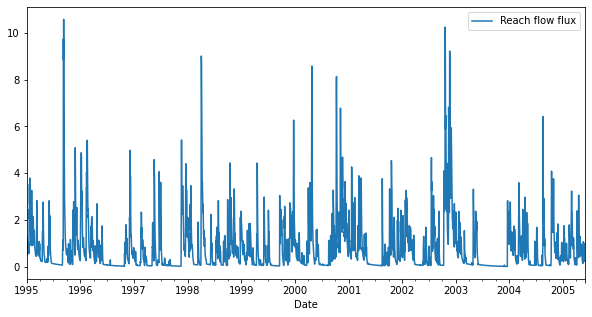

In [6]:
# Modify some parameters
sq = app["SimplyQ land"]
sq.bfi = 0.1   # Modify baseflow index
sq.tc_g = 100  # Modify groundwater residence time

app.run()
app.var('Reach flow flux')['Coull'].plot(figsize=(10, 5), legend=True)

<Axes: xlabel='Date'>

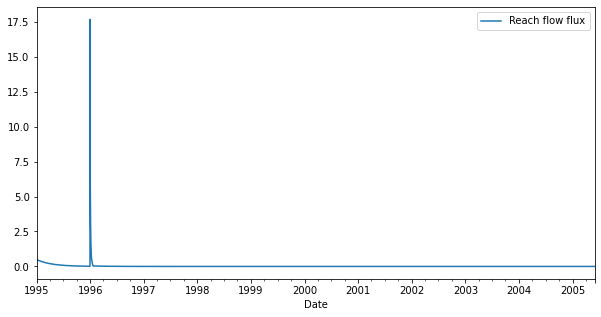

In [7]:

# Modify the precipitation forcing
precip = app.var('Precipitation')[()]
precip.loc[:] = 0
precip.loc['1996-1-1'] = 200
app.var('Precipitation')[()] = precip

app.run()
app.var('Reach flow flux')['Coull'].plot(figsize=(10, 5), legend=True)